<a href="https://colab.research.google.com/github/bpananalytics/bpananalytics/blob/main/Price_Over_Income_Unveiling_the_Key_Driver_of_Cigarette_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Disclaimer
The dataset included in this portfolio is intended solely for demonstration purposes as part of the Brian Pan's portfolio and is to not be used for any other unintended purposes. The data has been anonymized and modified to preserve confidentiality and privacy. Any resemblance to real persons, living or deceased, or real entities is purely coincidental.

Dataset from Stock, J.H. and Watson, M.W. (2007). Introduction to Econometrics, 2nd ed. Boston: Addison Wesley.



## Executive Summary

#### Study Overview
This study examines the factors affecting cigarette sales using an Ordinary Least Squares (OLS) regression analysis. The objective is to understand how income, taxes, and cigarette prices influence the number of cigarette packs sold.

#### Key Findings
1. **Price Impact:** The most significant factor affecting cigarette sales is the price of cigarettes. An increase in price leads to a substantial decrease in the number of packs sold, demonstrating a clear negative relationship between price and demand. This finding is statistically significant, with a coefficient of -34.14 and a p-value of 0.038.

2. **Income Influence:** Changes in income do not have a significant impact on cigarette sales within the scope of this study. The coefficient for income is -18.98 with a p-value of 0.163, indicating that variations in income levels do not meaningfully affect cigarette consumption.

3. **Tax Effect:** The effect of taxes on cigarette sales is also not statistically significant in this analysis. Although the coefficient for tax is -34.92, suggesting a potential decrease in sales with higher taxes, the p-value of 0.132 implies that this result is not strong enough to be conclusive.

#### Implications
- **Policy Makers:** The significant negative relationship between cigarette prices and sales supports the implementation of higher cigarette taxes and price increases as effective measures for reducing cigarette consumption and improving public health.
  
- **Cigarette Manufacturers and Retailers:** Understanding the impact of pricing on sales can aid in strategic pricing and marketing decisions. Adjustments in price could be used to manage sales volumes and revenue effectively.

- **Public Health Advocates:** This data can be leveraged to advocate for policies aimed at increasing cigarette prices to reduce smoking rates and enhance public health outcomes.

- **Researchers:** The study provides valuable insights into consumer behavior and economic factors influencing cigarette sales, contributing to ongoing research in public health and economic impact studies.

#### Conclusion
The study highlights the critical role of cigarette pricing in influencing sales, with higher prices leading to reduced consumption. While income and tax effects are less clear, the findings underscore the importance of price-based interventions in tobacco control strategies.

## Analysis

### Introduction

Cigarette consumption remains a significant public health challenge, with substantial implications for both individual health and healthcare systems. Efforts to curb smoking have long focused on understanding the factors that influence cigarette sales and consumption. Among these factors, price, income, and taxes are often considered pivotal in shaping consumer behavior.

Understanding how these variables interact with cigarette sales is crucial for designing effective public health policies and pricing strategies. Higher cigarette prices are widely believed to deter smoking, making it a key focus for policymakers aiming to reduce smoking rates. Similarly, the effects of income changes and tax increases on cigarette sales are essential for a comprehensive understanding of consumer behavior and the effectiveness of tobacco control measures.

This study aims to analyze the impact of income, taxes, and cigarette prices on cigarette sales using an Ordinary Least Squares (OLS) regression model. By investigating these relationships, the research seeks to provide valuable insights into how economic factors influence cigarette consumption. The findings will contribute to the development of informed policies and strategies designed to mitigate smoking rates and improve public health outcomes.

Data Dictionary

A data frame containing 48 observations on 7 variables for 2 periods.

  state: Factor indicating state.

  year: Factor indicating year.

  cpi: Consumer price index.

  population: State population.

  packs: Number of packs per capita.

  income: State personal income (total, nominal).

  tax: Average state, federal and average local excise taxes for fiscal year.

  price: Average price during fiscal year, including sales tax.

  taxs: Average excise taxes for fiscal year, including sales tax.

### Initialization

In [ ]:
# Initializing code

!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

cig_df = pd.read_csv("/content/drive/MyDrive/CigarettesSW.csv")

ValueError: mount failed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

cig_df = pd.read_csv("/content/drive/MyDrive/CigarettesSW.csv")

Mounted at /content/drive


In [ ]:
cig_df

,rownames,state,year,cpi,population,packs,income,tax,price,taxs
0,1,AL,1985,1.076,3973000,116.486282,46014968,32.500004,102.181671,33.348335
1,2,AR,1985,1.076,2327000,128.534592,26210736,37.000000,101.474998,37.000000
2,3,AZ,1985,1.076,3184000,104.522614,43956936,31.000000,108.578751,36.170418
3,4,CA,1985,1.076,26444000,100.363037,447102816,26.000000,107.837341,32.104000
4,5,CO,1985,1.076,3209000,112.963539,49466672,31.000000,94.266663,31.000000
...,...,...,...,...,...,...,...,...,...,...
91,92,VT,1995,1.524,582827,122.334755,12448607,44.000000,175.638748,52.363750
92,93,WA,1995,1.524,5431024,65.530922,129680832,80.500000,239.109344,96.142670
93,94,WI,1995,1.524,5137004,92.466347,115959680,62.000000,201.381256,71.589584
94,95,WV,1995,1.524,1820560,115.568832,32611268,41.000000,166.517181,50.425499


In [ ]:
# Data Cleaning
df = cig_df
df.dtypes

rownames        int64
state          object
year            int64
cpi           float64
population      int64
packs         float64
income          int64
tax           float64
price         float64
taxs          float64
dtype: object

In [ ]:
df.shape

(96, 10)

In [ ]:
df.isnull().sum()

rownames      0
state         0
year          0
cpi           0
population    0
packs         0
income        0
tax           0
price         0
taxs          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

 We have thoroughly examined the dataset and can confirm that there are no records with duplicated or null values. All entries are unique and complete, ensuring the accuracy and reliability of the data for your analysis and decision-making needs.There are 10 variables with 96 records, with the first variable being a record index.

### Data Analysis



In [ ]:
df.iloc[:,3:].describe()

,cpi,population,packs,income,tax,price,taxs
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.500000,0.151230,109.182424,0.121624,0.304741,0.375156,0.296154
std,0.502625,0.175474,25.871305,0.157656,0.199236,0.281543,0.211593
min,0.000000,0.000000,49.272198,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.036890,92.450159,0.024371,0.160494,0.113794,0.147782
50%,0.500000,0.103789,110.160660,0.071640,0.234568,0.338413,0.216502
75%,1.000000,0.174852,123.523010,0.157507,0.405864,0.584947,0.418201
max,1.000000,1.000000,197.993988,1.000000,1.000000,1.000000,1.000000


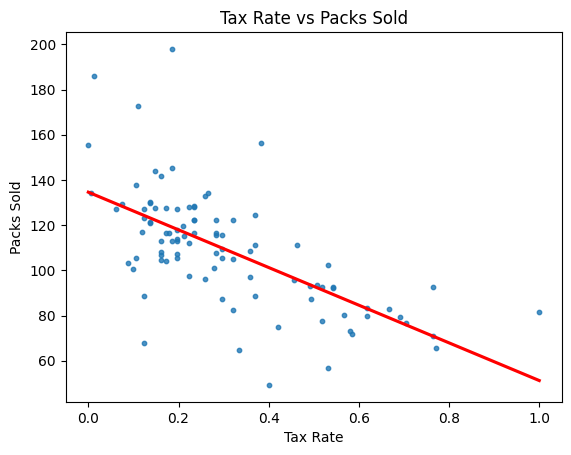

In [ ]:
# Scatter plot for tax vs packs
sns.regplot(x='tax', y='packs', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Tax Rate vs Packs Sold')
plt.xlabel('Tax Rate')
plt.ylabel('Packs Sold')
plt.show()


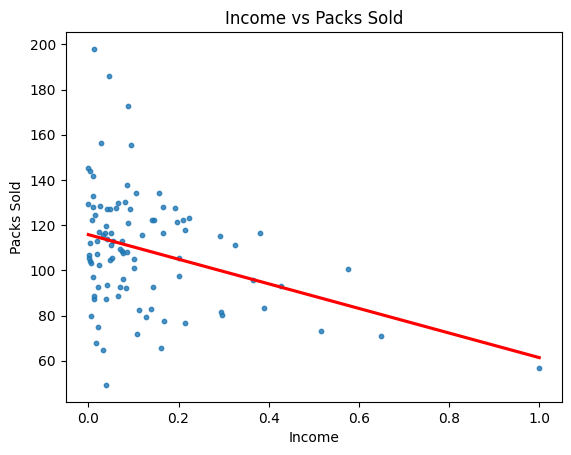

In [ ]:
# Scatter plot for income vs packs
sns.regplot(x='income', y='packs', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Income vs Packs Sold')
plt.xlabel('Income')
plt.ylabel('Packs Sold')
plt.show()


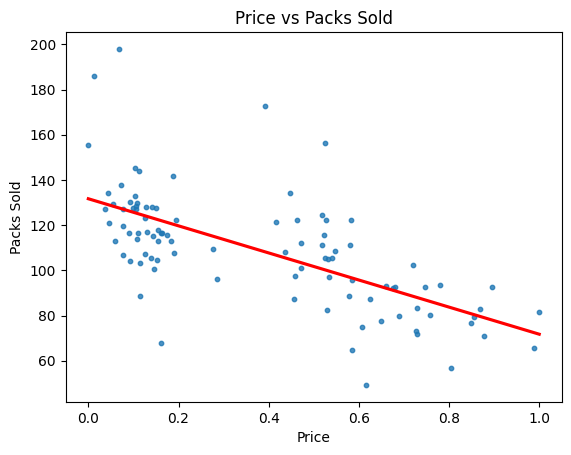

In [ ]:
# Scatter plot for price vs packs
sns.regplot(x='price', y='packs', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Price vs Packs Sold')
plt.xlabel('Price')
plt.ylabel('Packs Sold')
plt.show()


From our charts, we can see that Tax Rates, Income, and Price are inversely correlated with the number of cigarette packs sold. To better understand which variable significantly impacts cigarette consumption, we will first normalize the data as necessary and then conduct a multiple regression analysis to identify the key predictors in this context.

In [ ]:
# Normalize data set
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_columns = ['cpi', 'population', 'income', 'tax', 'price', 'taxs']

# Create a MinMaxScaler object
scaler_min_max = MinMaxScaler()

# Normalize the numerical columns
df[numerical_columns] = scaler_min_max.fit_transform(df[numerical_columns])

In [ ]:
# Define the independent variables and the dependent variable
X = df[['income', 'tax', 'price']]
y = df['packs']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract p-values
p_values = model.pvalues
print("\nP-values:\n", p_values)


                            OLS Regression Results                            
Dep. Variable:                  packs   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           4.47e-12
Time:                        21:23:57   Log-Likelihood:                -419.01
No. Observations:                  96   AIC:                             846.0
Df Residuals:                      92   BIC:                             856.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.9421      3.686     36.607      0.0

The OLS regression results indicate that the overall model explains approximately 45.3% of the variance in cigarette packs sold. Among the predictors, only `Price` has a statistically significant impact, with a p-value of 0.038, suggesting that higher prices are associated with reduced cigarette consumption. In contrast, `Income` and `Tax` are not statistically significant, as their p-values are 0.163 and 0.132, respectively. This implies that changes in income and tax rates do not significantly affect cigarette sales when controlling for other variables. The overall model is significant, with an F-statistic p-value well below 0.05, indicating that at least one predictor has a meaningful impact on cigarette consumption.

## Conclusion

The analysis looks at how different factors affect cigarette sales. We looked at three factors: income, taxes, and the price of cigarettes.

Here's what we found:
- **Income:** Changes in income don’t seem to significantly affect how many cigarettes people buy.
- **Taxes:** Higher taxes might lower cigarette sales, but the effect isn't strong enough to be certain from this data.
- **Price:** This is the most significant factor. When the price of cigarettes goes up, people buy fewer packs. This makes sense because people tend to buy less of something when it becomes more expensive.

Overall, the most reliable finding from this analysis is that increasing the price of cigarettes is likely to reduce sales.